# Periodic Functions

In [45]:
import os
import math

%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style> .container {width: 100% !important;}</style>"))

import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

In [46]:
def get_fft(t, y):
    '''
    FFT 
    '''
    sample_rate = round(1/(t[1]-t[0]))

    _fft = np.abs(rfft(y, axis=0, norm='forward')) 
    
    print(f'_fft.shape:{_fft.shape}, sample rate:{sample_rate}')
    
    return _fft, sample_rate

_fft.shape:(101,), sample rate:398


FloatSlider(value=0.5, continuous_update=False, description='T', max=10.0, min=0.1)

IntSlider(value=400, continuous_update=False, description='Fs', max=1000, min=1)

IntSlider(value=1, continuous_update=False, description='Hz', max=1000, min=1)

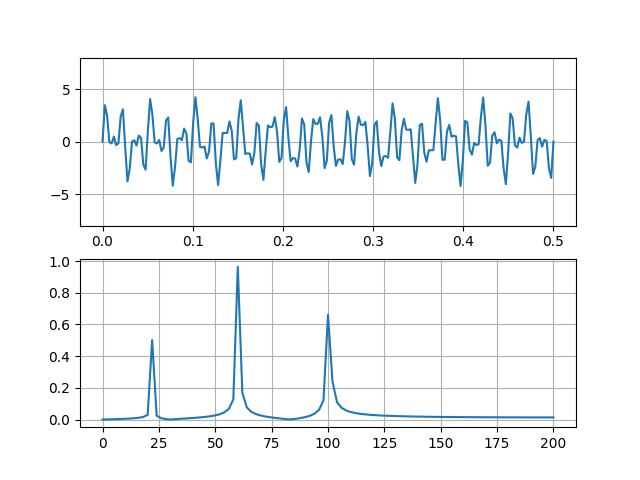

In [53]:
T = 0.5
Fs = 400
N = T*Fs
Hz = 1

x = np.linspace(0, T, round(N))

def model(x):
    return np.sin(22*2*np.pi*x) + 2*np.sin(60*2*np.pi*x) + 1.5*np.sin(100*2*np.pi*x)

def model_basic(x):
    global Hz
    return np.sin(Hz*2*np.pi*x)

fig, (ax, ax2) = plt.subplots(nrows=2, ncols=1)

def plot_model():
    global T, N, Fs
    
    x = np.linspace(0, T, round(N))
    plt.cla()
    y = model(x)
    
    _fft, _ = get_fft(x, y)
    _xf = rfftfreq(round(N), 1/Fs)
 
    ax.clear()
    ax.set_ylim([-8,8])
    ax.plot(x, y)
    ax.grid(True)
    
    ax2.clear()
    ax2.plot(_xf, _fft)
    ax2.grid(True)    

plot_model()

def update_T(change):
    global T, N, Fs
    
    T = change.new
    N = T * Fs
    
    plot_model()
    
intslider_T = widgets.FloatSlider(
    value=T, 
    min=0.1, max=10, step=0.1,
    description='T',
    continuous_update=False
)
intslider_T.observe(update_T, 'value')

def update_Fs(change):
    global T, N, Fs
    
    Fs = change.new
    N = T * Fs
    
    plot_model()

intslider_Fs = widgets.IntSlider(
    value=Fs, 
    min=1, max=1000, step=1,
    description='Fs',
    continuous_update=False
)
intslider_Fs.observe(update_Fs, 'value')

def update_Hz(change):
    global Hz
    
    Hz = change.new

    plot_model()

intslider_Hz = widgets.IntSlider(
    value=Hz, 
    min=1, max=1000, step=1,
    description='Hz',
    continuous_update=False
)
intslider_Hz.observe(update_Hz, 'value')

display(intslider_T, intslider_Fs, intslider_Hz)#, intslider_amp)

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

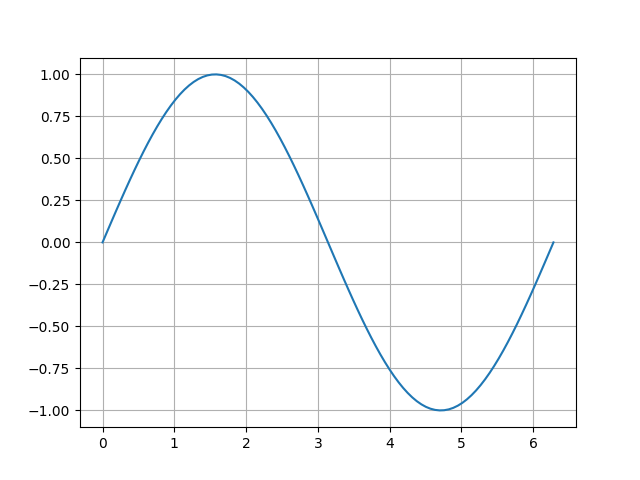

In [73]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

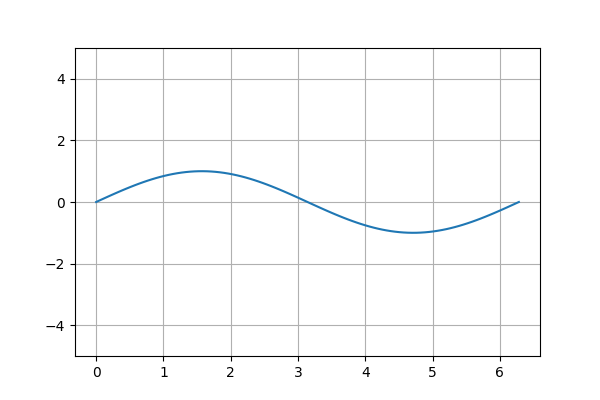

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01), y_limit=(1, 10, 1))
def update(w = 1.0, amp=1, phi=0, y_limit=5):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    #print(f'sine({
    ax.set_ylim([y_limit*-1, y_limit])
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')